# Classification

In [11]:
#Task - 01.

# load the dataset into a new Pandas data frame and print out the first few rows of the data frame.
#import pandas
import pandas as pd
# load dataset
df = pd.read_csv('/content/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [12]:
#Task - 02.

# Calculate the median blood pressure for people with diabetes (Outcome == 1)
median_blood_pressure = df[df['Outcome'] == 1]['BloodPressure'].median()

print(f"The median blood pressure for people diagnosed with diabetes is: {median_blood_pressure}")

The median blood pressure for people diagnosed with diabetes is: 74.0


For people diagnosed with diabetes, their median blood pressure is 74.0

In [13]:
#Task - 03.

# Count the occurrences of each outcome (0 and 1)
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)

# Check if the dataset is balanced
is_balanced = outcome_counts[0] == outcome_counts[1]
print(f"Is the dataset balanced? {is_balanced}")


Outcome
0    500
1    268
Name: count, dtype: int64
Is the dataset balanced? False


As demonstrated above since the total number of outcomes in both categories are not equal it can be said that this dataset isn't balanced.

In [14]:
#Task - 04.

#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'Age','Glucose','BMI','DiabetesPedigreeFunction']
X = df[feature_cols] # Features
Y = df.Outcome # Target variable

Task - 05.

*  The first line of code imports the train_test_split function from sklearn

*   The second line splits the data into 2 sets (train and Test set), the test size contributes to 25% of the datset and train, 75%.

*   random_state=1 ensures reproducibility of the split whenever the code is run, and finally,

*   stratify=y divides the classes equally within the split given that the outcome column isnt evenly distributed



In [15]:
#Task - 06.

#A train-test split of 3:1 is obtained.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1, stratify=Y)

In [16]:
#Task - 07.

#Fit a DecisionTreeClassifier to the training dataset
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

In [17]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [18]:
# Import the function to calculate accuracy score
from sklearn.metrics import accuracy_score
# Apply the function to find the correct predictions
accuracy = accuracy_score(Y_test,y_pred)
# Display the accuracy
print ('The Decision Tree Model Accuracy:',accuracy)

The Decision Tree Model Accuracy: 0.734375


The model accuracy score of 0.734 (73.4%) denotes that 73.4% of the predictions are correct. However, since this is an imbalanced dataset, this measure won't prove efficient, and it could be recommended to use either precision, recall or F1-score.

In [19]:
#Task - 08.

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_acc = accuracy_score(Y_train, y_train_pred)
test_acc = accuracy_score(Y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.7344


Since training accuracy is greater than test accuracy and not approximately equal it can be concluded that, the model indeed has evidence of overfitting.

Task - 09.

*  Precision: This evaluation metric mesures how many of the predictions are actually correct. This report demonstrates that 71% of the patients who had diabetes were accurately predicted, while 77% of the patients who didn't have diabetes were accuratley predicted.

*   Recall: This metric measures how many actual positive cases the model correctly identified. High recall means fewer false negatives. It can be said that 89% of patients not dianosed with diabetes were correctly identified , while 50% of of patients with diabetes were correctly identified.

*   Since this is a significant prediction (handling health conditions) a higher value for recall is recommended, especially given the fact that only 50% of diabetes diagnosed patients are correctly identified.



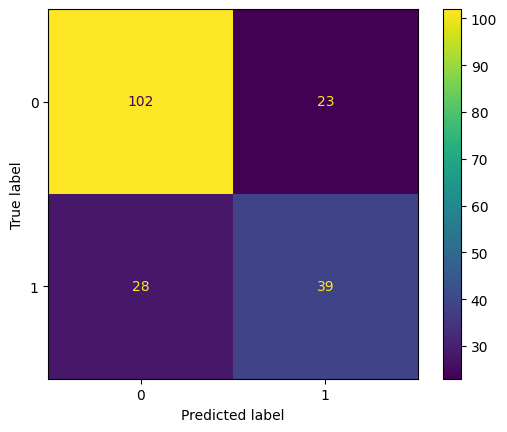

In [20]:
#Task - 10.

# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Construct the confusion matrix cm
cm = confusion_matrix(Y_test, y_pred, labels=clf.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
disp.plot()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       125
           1       0.63      0.58      0.60        67

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192




*   The number of false positives in this model is 23, as a prportion, 11.98%. This demostrates the proportion of non-diabetic cases incorrectly predicted as diabetic.
*   Sensitivity (Recall) tells you how well the model detects actual diabetes cases. Higher sensitivity means the model is better at identifying people with diabetes.

*    In this case the model dosent Do well when it comes to patients diagnosed with diabetes, but do well when it comes to undiagnosed patients. This could be due to the imbalance in the dataset.






In [31]:
#Task - 11.

import matplotlib.pyplot as plt
from sklearn import tree

# Create a figure and axes with larger figsize and higher dpi
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(50, 40), dpi=300)  # Increase figsize further

# Plot the decision tree with custom settings
tree.plot_tree(clf,
               filled=True,
               fontsize=14,  # Increase font size for better visibility
               feature_names=X.columns,  # If you have column names for features
               class_names=["No Diabetes", "Diabetes"],  # Class names
               rounded=True,  # Rounded nodes
               proportion=True,  # Show proportions in the nodes
               max_depth=5)  # Increase max depth for a larger tree (or set to None for full depth)

# Show the tree
plt.show()



In [32]:
#Task - 12.

# Get feature importances from the trained DecisionTree model
feature_importances = clf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                    Feature  Importance
3                   Glucose    0.321531
4                       BMI    0.195274
5  DiabetesPedigreeFunction    0.173848
2                       Age    0.136278
1                   Insulin    0.106602
0               Pregnancies    0.066466


Referring to the tree plot and feature importances above it can be concluded on the fact that Glucose is the most important feature in predicting diabetes, followed by BMI and DiabetesPedigreeFunction

In [34]:
#Task - 13.

df2 = pd.read_csv('/content/diabetes.csv')

In [35]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'Age','Glucose','BMI','DiabetesPedigreeFunction']
X = df[feature_cols] # Features
y = df.Outcome # Target variable

from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

#This is to show the number of instances and input features in the training and test sets
print('X_train Instances', X_train.shape)
print('X_test Instances', X_test.shape)

X_train Instances (576, 6)
X_test Instances (192, 6)


In [36]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 4)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [37]:
#Perform predictions on the test data
y_pred=knn.predict(X_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       125
           1       0.62      0.39      0.48        67

    accuracy                           0.70       192
   macro avg       0.67      0.63      0.63       192
weighted avg       0.69      0.70      0.68       192




*   In order to recommend a model the F1 score will be itilised.
*   The F1 score is a metric used to evaluate the performance of a classification model, particularly when dealing with imbalanced datasets. It is the harmonic mean of precision and recall, providing a balance between the two.

*   Since the DecisionTreeClassifier has an F1 score of 60% for patients diagnosed with diabetes and is higher (although, not favourable) than that of the KNeighborsClassifier at 48%, the model that performs the best is the DecisionTreeClassifier and should be recommended.





# Clustering

In [39]:
#Task - 14.

df3 = pd.read_csv('/content/pm25_2016_2020.csv')
df3.head()

Unnamed: 0 date_local  latitude_x  longitude_x  elevation  tavg  tmin  \
0           0  6/15/2017   39.024265   -95.711275      280.0   NaN   NaN   
1           1  6/18/2017   39.024265   -95.711275      280.0   NaN   NaN   
2           2  6/21/2017   39.024265   -95.711275      280.0   NaN   NaN   
3           3  6/24/2017   39.024265   -95.711275      280.0   NaN   NaN   
4           4  6/30/2017   39.024265   -95.711275      280.0   NaN   NaN   

   tmax  prcp  snow  wdir  wspd  wpgt  pres  tsun  arithmetic_mean_a  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                8.6   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                3.4   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                6.6   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                5.1   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                5.0   

   arithmetic_mean_b  
0                9.2  
1                3.9  
2                6.7  
3                5.7  
4                6.4

The two columns that could be used to analyse the geogrphicdistribution of weather monitoring stations can be, 'latitude_x' and 'longitude_x

In [44]:
#Task - 15.

geo_dist = ['latitude_x',	'longitude_x']
X = df3[geo_dist]

Task - 16.

*  The first line of code imports the KMeans function from sklearn.cluster

*   The second line specifies that the data should be clustered into 6 categories in this model.

*   The thord line allows the model to fit (train) on data from the data frame X that was created earlier, and finally,

*   The last line converts the predicted cluster datatype into a category datatype to ensure ease of use while employing in the rest of the code



In [45]:
#Task - 17.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
X['Cluster'] = kmeans.fit_predict(X)
X['Cluster'] = X['Cluster'].astype('category')

<ipython-input-45-9a8ca44725b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.fit_predict(X)
<ipython-input-45-9a8ca44725b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = X['Cluster'].astype('category')


In [46]:
cluster_counts = X['Cluster'].value_counts()
print(cluster_counts)

Cluster
1    27751
0    23752
2    23244
3    22349
4     2904
Name: count, dtype: int64




*   Cluster 0: 23,752
*   Cluster 1: 27,751
*   Cluster 2: 23,244
*   Cluster 3: 22,349
*   Cluster 4: 2,904





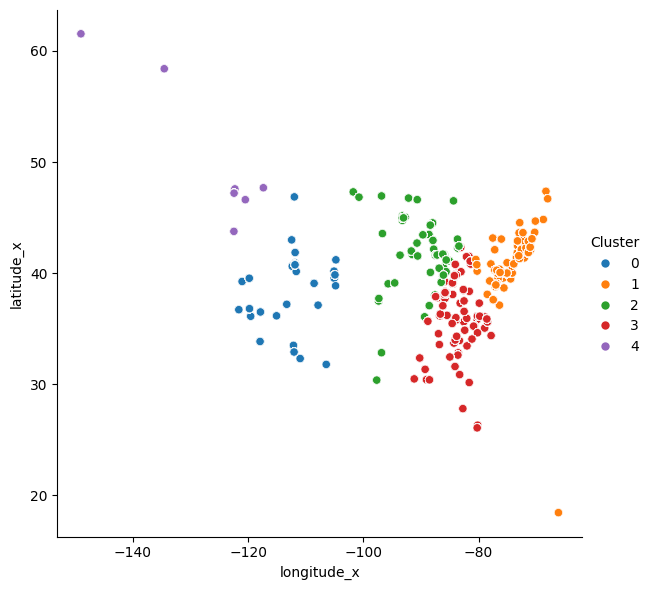

In [47]:
#Task - 18.

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (12,8)

sns.relplot(x = 'longitude_x', y = 'latitude_x', hue = 'Cluster', data = X, height = 6)